In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

## <span style="color:blue"> Exercise 5.1</span>

In [2]:
#read files from ground state simulation
r_1 , errors1 = np.loadtxt("ps1.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')
r_2 , errors2 =np.loadtxt("ps2.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')

r1_uni , r1_g = np.split( r_1 , 2 )
r2_uni , r2_g = np.split ( r_2 , 2 )
err_1_u , err_1_g = np.split (errors1 , 2)
err_2_u , err_2_g = np.split (errors2 , 2)

plt.style.use('dark_background')

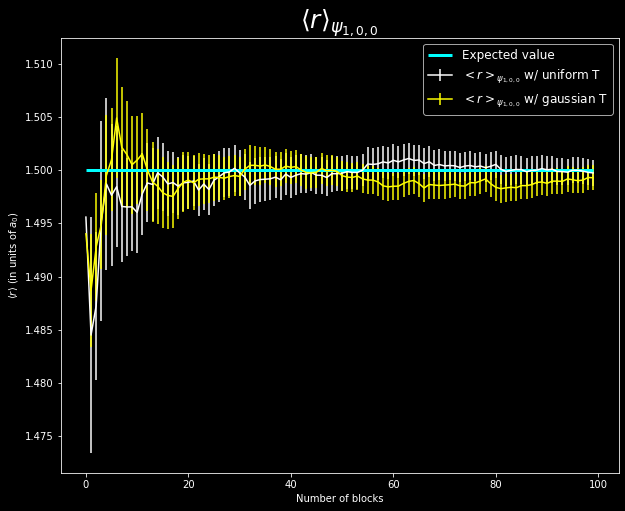

In [15]:
#plots of the mean value
fig , ax = plt.subplots(1,1 , figsize=(10,8))
ax.errorbar( np.arange( 100 ) , r1_uni , yerr= err_1_u , color = "white" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ uniform T")
ax.errorbar( np.arange( 100 ) , r1_g , yerr= err_1_g , color = "#FFFF00" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ gaussian T")
ax.hlines(1.5 , 0 , 99 , color = "#00FFFF" , linewidth = 3 , label ="Expected value")

ax.set_title( r"$\langle r\rangle_{ \psi _{1,0,0} }$" , fontsize=25)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$\langle r\rangle $ (in units of $a_0$)')


#ax.grid(True)
ax.legend(loc="best" , prop={'size': 12} )

The graph shows the estimates of the mean value of $r$, $ \langle r\rangle $, for the probability density $ \psi_ {1,0,0} $, which is the ground state of the hydrogen atom. The Metropolis algorithm was used to sample this probability density. In the case of the yellow graph, the transition probability $ T (x'|x_n) $ is uniform, centered at the point $ x_n $, and of width $1.2$. In the green graph, on the other hand, $ T (x '| x_n) $ is a Gaussian distribution always centered in $ x_n $, with variance $0.75$. The variance and width were chosen following the rule of thumb of $ 50 \% $.
The sampled points in each simulation are $ 10^7 $, the data blocking technique was then used in order to obtain an estimate of the uncertainties.

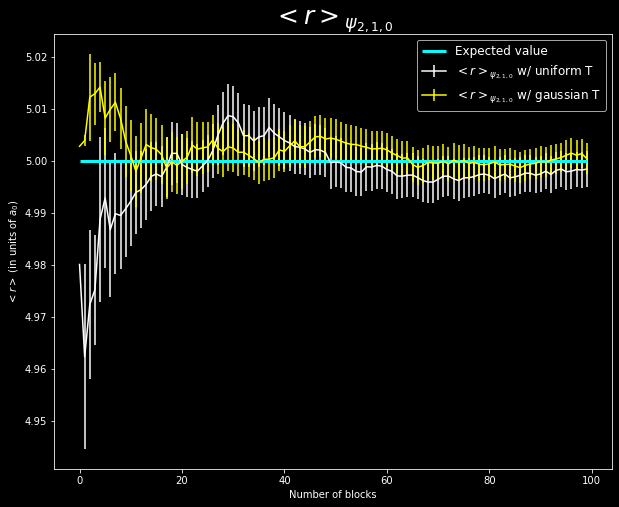

In [16]:
fig , ax = plt.subplots(1,1 , figsize=(10,8))
ax.errorbar( np.arange( 100 ) , r2_uni , yerr= err_2_u , color = "white" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ uniform T")
ax.errorbar( np.arange( 100 ) , r2_g, yerr= err_2_g , color = "yellow" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ gaussian T")
ax.hlines(5 , 0 , 99 , color = "#00FFFF" , linewidth = 3 , label ="Expected value")

ax.set_title(r"$<r>_{ \psi _{2,1,0} }$" , fontsize=25)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$<r> $ (in units of $a_0$)')


#ax.grid(True)
ax.legend(loc="best" , prop={'size': 12})

The graph shows the estimates of the mean value of $r$, $ \langle r\rangle $, for the probability density $\psi_ {2,1,0} $, which is the first excited state of the hydrogen atom. The Metropolis algorithm was used to sample this probability density. In the case of the white graph, the transition probability $ T (x '| x_n) $ is uniform, centered at the point $ x_n $, and of width $3$. In the purple graph, instead, $ T (x' | x_n) $ is a Gaussian distribution always centered in $ x_n $, with variance $1.9$. The variance and width were chosen following the rule of thumb of $ 50 \% $.
The points sampled in each simulation are $ 10 ^ 7 $, the data blocking technique was then used in order to obtain an estimate of the uncertainties and to reduce the correlation between the data.

## Simulazione partendo da un punto non ottimale: (15 , 0 , 0)

In [17]:
r_1f , errors1f = np.loadtxt("ps1_far.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')
r_2f , errors2f =np.loadtxt("ps2_far.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')

r1_unif , r1_gf = np.split (r_1f , 2)
r2_unif , r2_gf = np.split ( r_2f , 2)
err_1_uf , err_1_gf = np.split (errors1f , 2)
err_2_uf , err_2_gf = np.split (errors2f , 2)

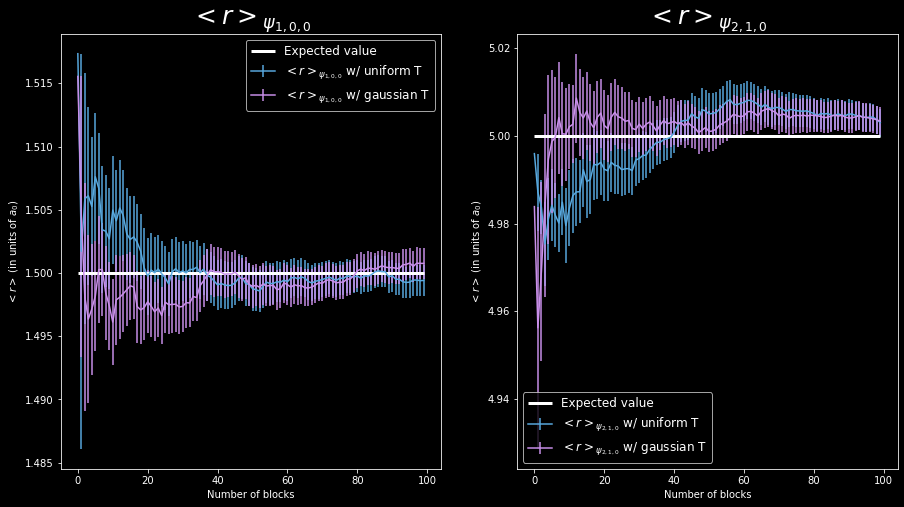

In [21]:
fig , ax = plt.subplots(1,2 , figsize=(15,8))

ax[0].errorbar( np.arange( 100 ) , r1_unif , yerr= err_1_uf , color = "#58A9DF" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ uniform T")
ax[0].errorbar( np.arange( 100 ) , r1_gf , yerr= err_1_gf , color = "#C98FEA" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ gaussian T")
ax[0].hlines(1.5 , 0 , 99 , color = "white" , linewidth = 3 , label ="Expected value")

ax[0].set_title(r"$<r>_{ \psi _{1,0,0} }$" , fontsize=25)
ax[0].set_xlabel('Number of blocks')
ax[0].set_ylabel(r'$<r> $ (in units of $a_0$)')


#ax[0].grid(True)
ax[0].legend(loc="best" , prop={'size': 12})

ax[1].errorbar( np.arange( 100 ) , r2_unif , yerr= err_2_uf , color = "#58A9DF" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ uniform T")
ax[1].errorbar( np.arange( 100 ) , r2_gf, yerr= err_2_gf , color = "#C98FEA" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ gaussian T")
ax[1].hlines(5 , 0 , 99 , color = "white" , linewidth = 3 , label ="Expected value")

ax[1].set_title(r"$<r>_{ \psi _{2,1,0} }$" , fontsize=25)
ax[1].set_xlabel('Number of blocks')
ax[1].set_ylabel(r'$<r> $ (in units of $a_0$)')


#ax[1].grid(True)
ax[1].legend(loc="best" , prop={'size': 12})

#posizione iniziale distante 10 raggi di bohr dall'origine

The graphs show the average value $ \langle r \rangle $ calculated in a simulation in which the starting point is not optimal. This does not seem to affect particularly in the case of the ground state, instead the final estimate of $ \langle r \rangle $ in the case of the first excited state is no longer compatible with the expected value. The algorithm therefore finds it more difficult to sample this wave function, it will be necessary to increase the number of samples to find a compatible result. In the next graph I have reported the two graphs of the average value of the distance from the origin for the first excited state, in order to make it clearer which has the best compatibility with the expected value, in both cases in which the starting point is more suitable for the probability distribution and in which the starting point is far away.

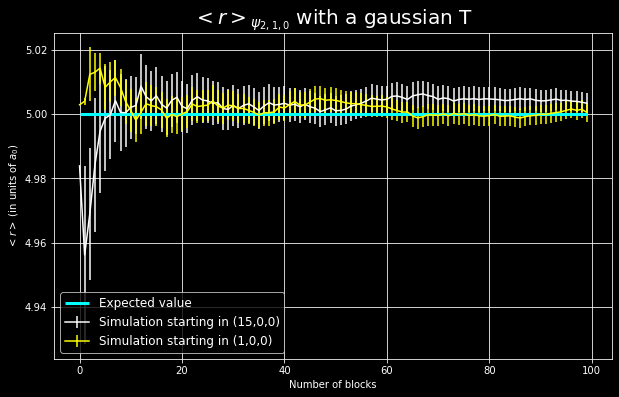

In [26]:
fig , ax = plt.subplots(1,1 , figsize=(10,6))
ax.errorbar( np.arange( 100 ) , r2_gf , yerr= err_2_gf , color = "white" , label = r"Simulation starting in (15,0,0)")
ax.errorbar( np.arange( 100 ) , r2_g , yerr= err_2_g , color = "yellow" , label = r"Simulation starting in (1,0,0)" )
ax.hlines(5 , 0 , 99 , color = "#00FFFF" , linewidth = 3 , label ="Expected value")

ax.set_title( r"$<r>_{ \psi _{2,1,0} }$ with a gaussian T" , fontsize=20)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$<r> $ (in units of $a_0$)')


ax.grid(True)
ax.legend(loc="best" , prop={'size': 12} )